In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
class KMeans:
    def __init__(self, k, iteration, n_init=10, random_state=None):
        self.k = k
        self.iteration = iteration
        self.random_state = random_state
        self.n_init = n_init
        
    
    def _assign_class(self):
        self.x_clus = np.zeros(self.x.shape[0])
        
        # assign each points a cluster by calculating the nearest distance
        for i in range(self.x.shape[0]):
            distance = []
            for j in range(self.k):
                # perform the L2 Norm equation
                # first method
                norm = np.sqrt(np.sum((self.x[i] - self.centroids[j])**2))
                # or second method
                norm = np.linalg.norm(self.x[i] - self.centroids[j])
                distance.append(norm)
            self.x_clus[i] = np.argmin(distance)
            
    
    def _compute_centroids(self):
        for i in range(self.centroids.shape[0]):
            self.centroids[i] = np.mean(self.x[self.x_clus == i], axis=0)
            
    
    def _random_initial(self):
        if self.random_state:
            np.random.seed(self.random_state)
            
        rand_idx = np.random.permutation(self.x.shape[0])
        self.centroids = self.x[rand_idx[:self.k]]
        
    
    def _compute_cost(self):
        cost = 0
        for i in range(self.k):
            distance = self.x[self.x_clus == i] - self.centroids[i]
            cost += np.sum(np.linalg.norm(distance, axis=1)**2)

        cost = 1 / len(self.x) * cost
        return cost
    
    
    def fit(self, x):
        self.x = x
        self.cost_hist = []
        self.centroids_hist = []
        
        # repeatedly initialize centroids for n_init
        for _ in range(self.n_init):
            self._random_initial()
            
            for _ in range(self.iteration):
                self._assign_class()
                self._compute_centroids()
            
            self.centroids_hist.append(self.centroids)
            self.cost_hist.append(self._compute_cost())
        
        # choose the centroids by located the index of lowest cost in cost_hist
        lowest_cost_idx = np.argmin(self.cost_hist)
        self.centroids = self.centroids_hist[lowest_cost_idx]
        self._assign_class()

    
    def plot(self):
        y_pred = np.concatenate((self.x, self.x_clus.reshape(-1, 1)), axis=1)
        
        sns.scatterplot(x=y_pred[:, 0], y=y_pred[:, 1], hue=y_pred[:, 2], palette='deep')
        sns.scatterplot(x=self.centroids[:, 0], y=self.centroids[:, 1], marker='v', c='red')

### Test Case 1: 

In [118]:
x = np.load('data.npy')
x.shape

(300, 2)

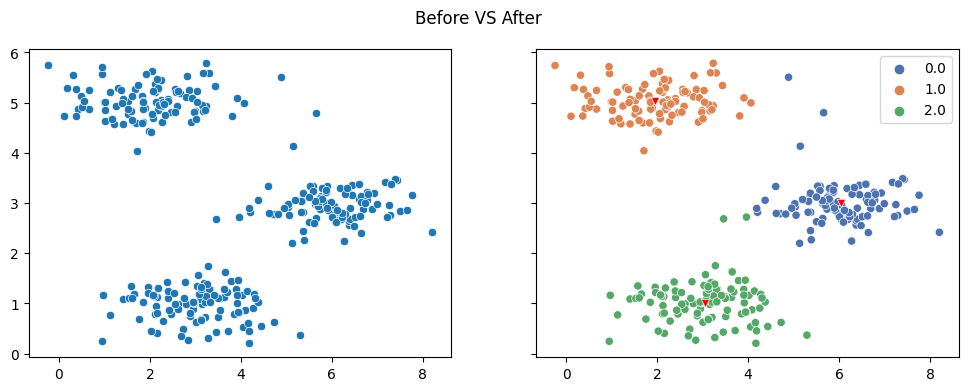

In [119]:
model = KMeans(k=3, iteration=10)
model.fit(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Before VS After')

sns.scatterplot(ax=ax[0], x=x[:, 0], y=x[:, 1])
ax[1] = model.plot()

### Test Case 2:

In [120]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=42)

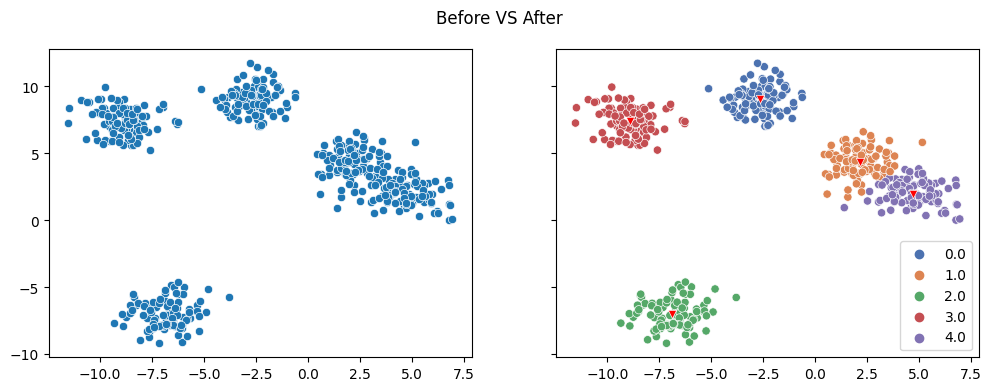

In [121]:
model = KMeans(k=5, iteration=20)
model.fit(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Before VS After')

sns.scatterplot(ax=ax[0], x=x[:, 0], y=x[:, 1])
ax[1] = model.plot()